In [ ]:
import numpy as np
from matplotlib import pyplot as plt

---
# Обзор задач, решаемых статистикой. Введение
---

### Задача.

---

Найти моду случайной величины, распределение которой задано таблицей:
$$
\begin{array}{c|c|c|c|c|c}
\xi & 1 & 2 & 3 & 4 & 5 \\
\hline
\mathsf P & \frac{1}{8} & \frac{1}{4} & \frac{1}{6} & \frac{1}{12} & \frac{9}{24}
\end{array}
$$

---

Значения $\{2,\ 5\}$ являются модами $\xi$, потому что $\mathsf P(1) < \mathsf P(2) < \mathsf P(3)$ и $\mathsf P(4) < \mathsf P(5) < \mathsf P(\xi > 5) = 0$.

---

<BarContainer object of 5 artists>

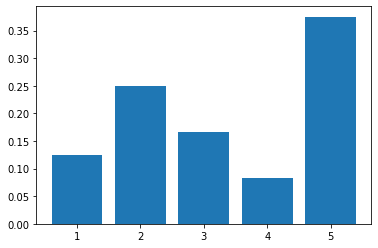

In [ ]:
plt.bar([1, 2, 3, 4, 5], [1 / 8, 1 / 4, 1 / 6, 1 / 12, 9 / 24])

### Задача.

---

Плотность случайной величины $\xi$ задается выражением

$$
f_\xi(x) = \frac{3}{4} \cdot \frac{1}{\sqrt{2\pi}2}e^{-\frac{(x - 3)^2}{8}} + \frac{1}{4} \cdot \frac{1}{\pi(1 + x^2)}
$$

Унимодально ли это распределение? Если нет, то сколько мод оно имеет?

---

Можно заметить, что перед нами — сумма двух плотностей распределений: нормального и Коши. Они оба унимодальны и имеют моды в точках $3$ и $0$  соответственно. Можно взять производную от $f_xi$ и проверить, являются ли точки $3$ и $0$ строгими экстремумами, и убедиться в том, что являются.

---

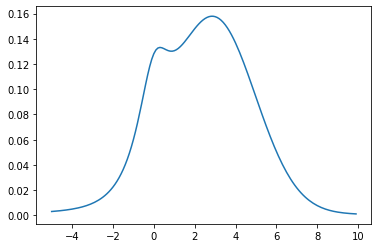

In [ ]:
x = np.arange(-5, 10, 0.1)
y = 3 / 4 * 1 / (2 * np.sqrt(2 * np.pi)) * np.exp(- (x - 3) ** 2 / 8) + 1 / 4 * 1 / (np.pi * (1 + x ** 2))
plt.plot(x, y)

---
# Точечное и интервальное оценивание
---

### Задача.

---

В некотором дачном поселке земля на всех участках одинаково плодородна, и все сажают кабачки одинаково: в одно и то же время, в одних и тех же условиях и так далее. Дачница Валентина Петровна согласилась поделиться статистикой сбора урожая кабачков за последние $10$ лет. Данные по количеству (в шт.) собранных кабачков дает следующая выборка:

$$(5, 12, 7, 4, 9, 10, 9, 4, 9, 12)$$

Построить распределение эмпирической случайной величины $\xi^*$. Вычислить вероятность события $A$, что случайно взятый дачник в следующем году соберет от $7$ до $9$ кабачков.

---

Распределение $\xi^*$:

$$
\begin{array}{c|c|c|c|c|c|c}
\xi & 4 & 5 & 7 & 9 & 10 & 12 \\
\hline
\mathsf P & \frac{2}{10} & \frac{1}{10} & \frac{1}{10} & \frac{3}{10} & \frac{1}{10} & \frac{2}{10}
\end{array}
$$

Получается, $\mathsf P(A) = \mathsf P(\xi^* = 9) + \mathsf(\xi^*=7) = \frac 4 {10}$

---


<BarContainer object of 6 artists>

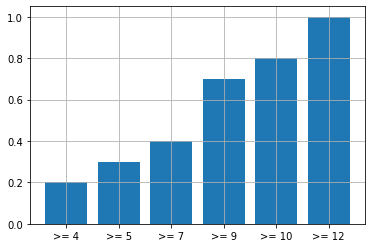

In [ ]:
X = np.array([5, 12, 7, 4, 9, 10, 9, 4, 9, 12])
distribution, accum = {}, 0

for i in sorted(np.unique(X)):
    accum += np.array(X == i).sum() / X.size
    distribution[f'>= {i}'] = accum

plt.grid()
plt.bar(distribution.keys(), distribution.values())

### Задача.

---

Председатель садоводства Михаил Семенович, агроном по образованию, но статистик в душе, решил обработать данные, озвученные Валентиной Петровной, чтобы выступить с докладом в объединенном обществе садоводов. Напомним, что распределение эмпирической случайной величины $\xi^*$ задается таблицей

$$
\begin{array}{c|c|c|c|c|c|c}
\xi^\ast & 4 & 5 & 7 & 9 & 10 & 12 \\ \hline
\mathsf P & \frac{2}{10} & \frac{1}{10} & \frac{1}{10} & \frac{3}{10} & \frac{1}{10} & \frac{2}{10}
\end{array}
$$

Оценить среднее количество выращенных кабачков в год на одного садовода, вычислив $\widetilde{\mathsf{E}} \xi^\ast = \overline{X}$.

Оценить среднее квадрата разброса $\widetilde{\mathsf D} \xi^\ast = S^2$.

Оценить медиану $\widehat{\mathsf{med} \ \xi}$ генеральной совокупности $\xi$, вычислив медиану $\xi^*$.

Найти моды эмпирического распределения.

---

$$
\widetilde{\mathsf{E}} \xi^\ast = \overline{X} = \dfrac 1 {|X|} \sum\limits_{i\in X} i = 8.1
$$
$$
\widetilde{\mathsf D} \xi^\ast = S^2 = \dfrac 1 {|X| - 1} \sum\limits_{i\in X} \left(X - \overline X\right)^2 = 8.09
$$
$\widehat{\mathsf{med} \ \xi}=9$, потому что $P(\xi^*\leq 9) > 0.5$ и $P(\xi^*\geq 9) > 0.5$.

А моды — это $\{4,\ 9,\ 12\}$.

---

8.1 8.090000000000002 9.0


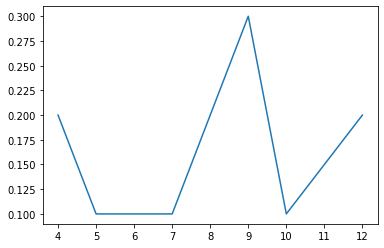

In [ ]:
print(np.mean(X), np.var(X), np.median(X))
plt.plot([4, 5, 7, 9, 10, 12], [2/10, 1/10, 1/10, 3/10, 1/10, 2/10])
plt.show()

# Задание

Ваша задача, оценить параметры распределения по выборке объема $n = 10$ из распределения Бернулли $\mathsf B_{0.93}$

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://de.ifmo.ru/--openedu/appliedstatistics/course2019/ex1/Bernoulli_10_128.csv', header=None)
df

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [ ]:
p = df[0].mean()
print(p, abs(p - 0.93))

1.0 0.06999999999999995


In [ ]:
S2 = np.var(df[0], ddof=0)
print(S2, abs(S2 - 0.93*(1-0.93)))

0.0 0.06509999999999996


In [ ]:
df1 = pd.read_csv('https://de.ifmo.ru/--openedu/appliedstatistics/course2019/ex1/Bernoulli_10000_128.csv', header=None)
df1

,0
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
9995,1.0
9996,1.0
9997,1.0
9998,1.0


In [ ]:
p = df1[0].mean()
print(p, abs(p - 0.93))

0.9296 0.00040000000000006697


In [ ]:
S2 = np.var(df1[0], ddof=0)
print(S2, abs(S2 - 0.93*(1-0.93)))

0.06544384 0.00034384000000003967
